<a href="https://colab.research.google.com/github/viveknaidu007/repo-35-DEEP-LEARNING-PROJECTS/blob/main/1-breast-cancer-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification with a simple Neural Network (NN)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
#data collection and preprocessing

# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()  #it was in dictonary format

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [9]:
data_frame.shape

(569, 31)

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [12]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [14]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [ ]:
# 1-->benign
# 0-->malignant

In [15]:
#gorupby function it wil gourp the datapoins
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [16]:
#seprating the feaetures and target

x = data_frame.drop(columns='label', axis=1)
y = data_frame['label']

In [17]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [18]:
#splitting the data into data and testing data
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)  #random sate is like if we using this our data will split in to some way some manner

In [22]:
print(x.shape, x_train.shape, x_test.shape)  #we can see here how r data is splitetd in to train ,test

(569, 30) (455, 30) (114, 30)


In [ ]:
#standardize the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [ ]:
#building the nueral netwrok

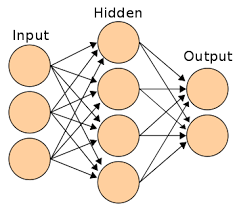

In [35]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
'''what is seed ? ok , now i set seed as 3 , there are several weights and parameters will be inialized
so each time we trin our nueral network it is an random way of generating the values , some of the values may be different
so the final outcome is that our accuracy value may change each time we run our nueral networks , inorder to avoid that we set a random seed
 so we set this random seed , no matter how many times we train the nueral netwroks we get the same accuracy score '''
from tensorflow import keras
#tensorflow deeplearning library developed by google
#keras is not an standalone library , so it wrapper of this tensorflow and keras
#when tensorflow was released intially it was hard to make neural nwtwork from tensorflow as coding part is bithard
#what keras did is , its backend after that building the nueral networks became easy they have created several apis and function so that easily build our nueral network so that this use of keras
#we can set our backend to tensorflow or pytorch in keras
#

In [36]:
#setting up the layers of nueral network

#flatten layers is converting our features into sinle dimentional layer , # its like convert the data into a sonle dimention array , and we need to mention input shape
#in input shape mention the number of columns in ur dataset #here we have 30 column

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),   #input layer
    keras.layers.Dense(20 , activation='relu'),   #20 means 20 nuerons we r giving #hidden layer
    keras.layers.Dense(2, activation='sigmoid')   #2  means 2 nuerons we r giving in output , sigmoid is just like logistic regression function    #ouput layer
])

#here we should not give any numbers of nuerons in output layer , it is equal to no fo classsed we have
#no of output layer is equal to no of classes that we have 0,1 in label column

In [37]:
#now compiling the nueral networks

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',  #there r several loss function r there , whenever we using the atrget 0,1 we use sparase_categorical_crossentropy
              metrics = ['accuracy'])

#whenever we using the targets as  0,1 we use sparase_categorical_crossentropy
#for one_hot_encoding we use
'''
dog = 0 , cat = 1 , horse = 2 # we use sparse_categorical_entropy as a loss function
or
our target values are like this below like onehotencoding labels , we use "categorical_crossentropy
dog = [1 0 0] #if it is dog the first value should be 1
cat = [0 1 0] #if it is cat our second avlue shoul be 1
horse = [0 0 1] #if it is horse our third value should be 1

# we can see documents in the internet
'''

'\ndog = 0 , cat = 1 , horse = 2 # we use sparse_categorical_entropy as a loss function\nor\nour target values are like this below like onehotencoding labels , we use "categorical_crossentropy\ndog = [1 0 0] #if it is dog the first value should be 1 \ncat = [0 1 0] #if it is cat our second avlue shoul be 1\nhorse = [0 0 1] #if it is horse our third value should be 1 \n\n# we can see documents in the internet\n'

In [32]:
#now training the nueral network

#note this is without the standardscaler

model.fit(x_train, y_train, validation_split=0.1, epochs=10)
#validatoin_split =0.1 menas we r using 10% per of data
#epoch is like how many times our model should go through this model data

Epoch 1/10
13/13 [==============================] - 2s 24ms/step - loss: 14.8031 - accuracy: 0.5477 - val_loss: 11.0029 - val_accuracy: 0.3478
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 4.8015 - accuracy: 0.6161 - val_loss: 1.7407 - val_accuracy: 0.8261
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 2.6316 - accuracy: 0.7042 - val_loss: 1.6224 - val_accuracy: 0.7391
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 2.0837 - accuracy: 0.7800 - val_loss: 1.1440 - val_accuracy: 0.7391
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 1.5491 - accuracy: 0.7579 - val_loss: 0.6910 - val_accuracy: 0.8261
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 1.3279 - accuracy: 0.8240 - val_loss: 0.9156 - val_accuracy: 0.7391
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 1.1975 - accuracy: 0.8117 - val_loss: 0.4810 - val_accuracy: 0.8478
Epoch 8/10
13/13 

In [56]:
#now training the nueral network
#note this is after standrardscaler we r traininng the model , we can difference between above and this model training ,loss ,accuracy , how standardscaler is usefull for bettering our model

history = model.fit(x_train, y_train, validation_split=0.1, epochs=10)
#validatoin_split =0.1 menas we r using 10% per of data
#epoch is like how many times our model should go through this model data

Epoch 1/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0269 - accuracy: 0.9927 - val_loss: 0.0569 - val_accuracy: 0.9783
Epoch 2/10
13/13 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 0.9927 - val_loss: 0.0574 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 17ms/step - loss: 0.0261 - accuracy: 0.9927 - val_loss: 0.0569 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 17ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.0565 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 16ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.0561 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 0.0247 - accuracy: 0.9951 - val_loss: 0.0562 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0243 - accuracy: 0.9951 - val_loss: 0.0557 - val_accuracy: 0.9783
Epoch 8/10
13

In [ ]:
#now visualising the accuracy and loss

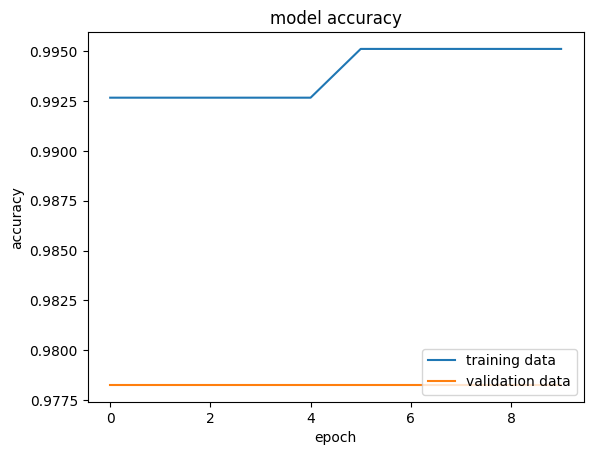

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

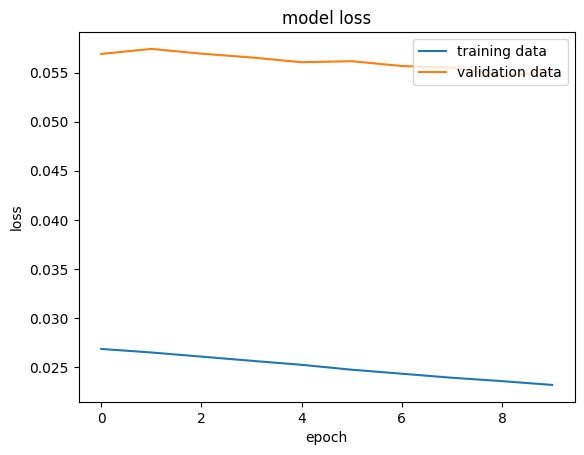

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#accuracy of the model on test data

In [60]:
loss, accuracy = model.evaluate(x_test , y_test)  #it will predict the x_test and comapre it with y_test
print(accuracy)
print(loss)

4/4 [==============================] - 0s 9ms/step - loss: 0.1151 - accuracy: 0.9474
0.9473684430122375
0.1151285320520401


In [62]:
print(x_test.shape)
print(x_test[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [69]:
#
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [70]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.38863274 0.37569138]


In [71]:
print(x_test)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [72]:
print(y_pred)

[[3.88632745e-01 3.75691384e-01]
 [3.96936327e-01 6.54639781e-01]
 [2.19237525e-02 9.92248774e-01]
 [9.99995828e-01 1.71620991e-13]
 [2.90944606e-01 7.79785931e-01]
 [9.99388576e-01 7.54225198e-08]
 [1.60840482e-01 8.18671227e-01]
 [1.44911995e-02 9.97481883e-01]
 [2.65251417e-02 9.85176086e-01]
 [3.43922600e-02 9.83644307e-01]
 [9.32915449e-01 7.01613650e-02]
 [3.13102543e-01 9.13299084e-01]
 [4.41858232e-01 3.74413699e-01]
 [2.04231739e-01 8.04492354e-01]
 [2.50466354e-02 9.82265711e-01]
 [9.99075174e-01 3.05555950e-05]
 [4.73414958e-02 9.76912618e-01]
 [1.19534414e-02 9.94308889e-01]
 [2.12594531e-02 9.81041729e-01]
 [9.95800436e-01 3.21458833e-06]
 [2.32233480e-03 9.97526944e-01]
 [2.30285935e-02 9.92749035e-01]
 [2.46373471e-02 9.87716258e-01]
 [1.18657043e-02 9.96768594e-01]
 [1.42455652e-01 9.25120533e-01]
 [9.97979820e-01 1.16342508e-05]
 [8.88929069e-02 9.52006459e-01]
 [2.94228494e-01 8.12402606e-01]
 [9.98574495e-01 3.22229280e-05]
 [9.99314666e-01 6.63605670e-06]
 [2.109972

In [ ]:
#function in numpy
#model.predict() gives the prediction probability of each class for that data point

In [74]:
#argmax function

mylist = [50,20,30]
index_of_max_value = np.argmax(mylist)
print(mylist)
print(index_of_max_value)  #here see thi np.argmax predict the max number in list which was the index 0,1,2 , hence we use this for below

[50, 20, 30]
0


In [75]:
#converting the prediction probability to class labels
#now

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)


[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
#building the predictive system

In [77]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

#change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('the tumor is malignant')

else:
  print('the tumor is benign')


1/1 [==============================] - 0s 18ms/step
[[0.04461442 0.97003967]]
[1]
the tumor is benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
